In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection  of high-level mathematical functions to operate on these arrays.
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
%matplotlib inline
#Plotly provides number of trace objects such as scatter, bar, pie, heatmap etc. and each is returned by respective functions in graph_objs functions.
import plotly.graph_objs as go
#To create subplots
from plotly.subplots import make_subplots
#The plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX.
import plotly.express as px
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
#This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements.
import seaborn as sns;sns.set(style="ticks", color_codes=True)
#Requests is a HTTP library for the Python programming language. The goal of the project is to make HTTP requests simpler and more human-friendly.
import requests
# The io module provides Python’s main facilities for dealing with various types of I/O. There are three main types of I/O: text I/O, binary I/O and raw I/O.
import io
# To work with date time variables
import datetime as dt

In [2]:
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)
# Setting this option will print all of the data in a row
pd.set_option('display.max_rows',None)

In [13]:
df = pd.read_csv("G:\\My Drive\\Data Science and Machine Learning\\ML and DS Projects\\Projects\\Hoom\\Availability , Location\\top_50_unpivot.csv")
df.head()

,Rank,Region Name,State Name,Latitude,Longitude,Year,Average House Price
0,1,"New York, NY",NY,40.712776,-74.005974,2000,236827.08
1,1,"New York, NY",NY,40.712776,-74.005974,2001,266033.25
2,1,"New York, NY",NY,40.712776,-74.005974,2002,299735.42
3,1,"New York, NY",NY,40.712776,-74.005974,2003,343624.08
4,1,"New York, NY",NY,40.712776,-74.005974,2004,387843.25


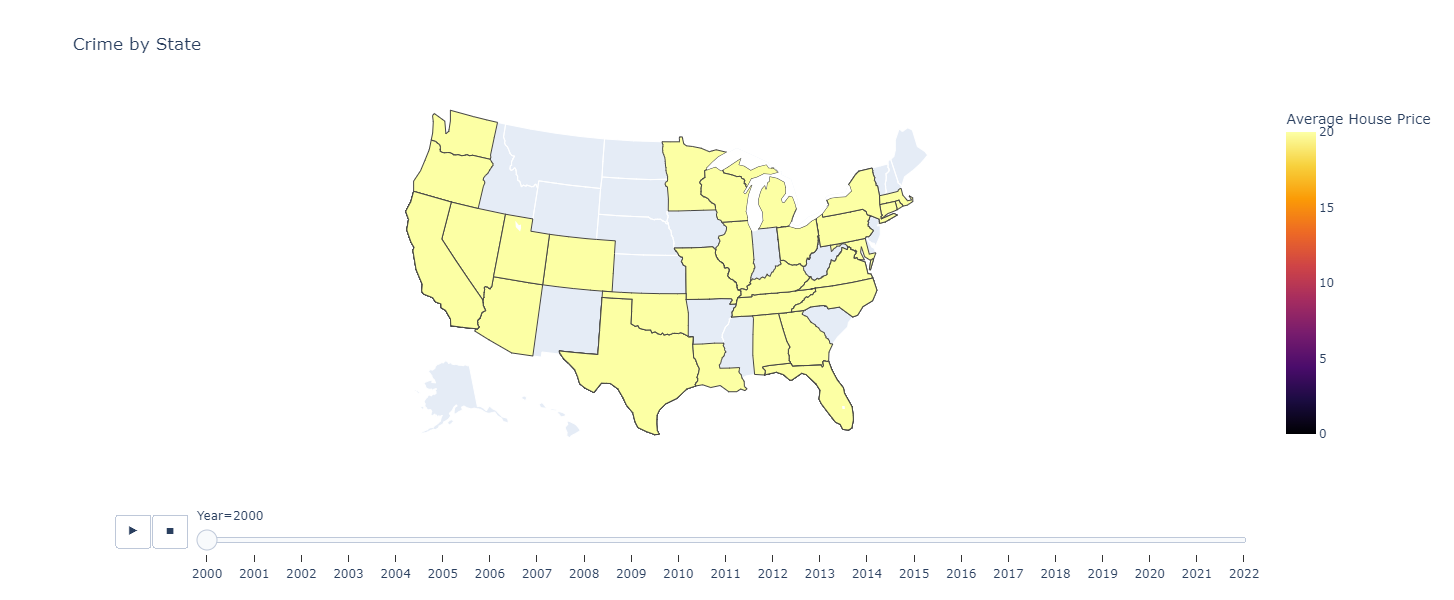

In [30]:
px.choropleth(df, 
              locations = 'State Name',
              color="Average House Price", 
              animation_frame="Year",
              color_continuous_scale="Inferno",
              locationmode='USA-states',
              scope="usa",
              range_color=(0, 20),
              title='Crime by State',
              height=600
             )

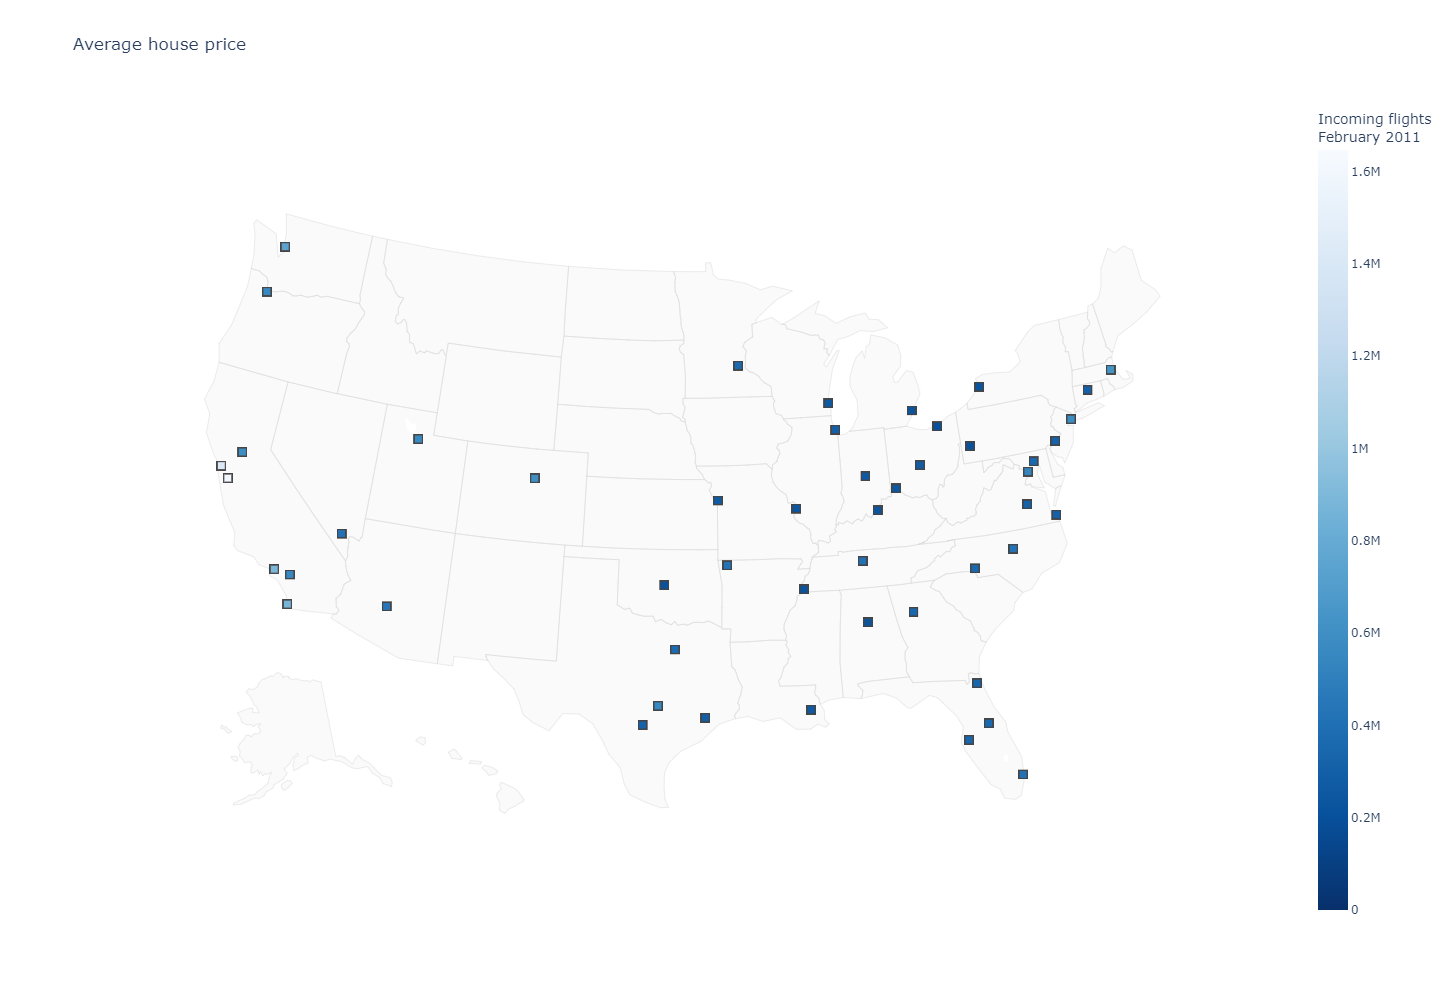

In [55]:
#layout = go.layout(scene = 'Year',
#                  title="Drone Flight Simulator Example",
#                   updatemenus=[dict(type="buttons",buttons=[dict(label="Play",method="animate",args=[None])])])


fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['Average House Price'],
        mode = 'markers',
        #layout = layout,
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = df['Average House Price'],
            cmax = df['Average House Price'].max(),
            colorbar_title="Incoming flights<br>February 2011"
        )))


fig.update_layout(
        height=1000,
        width=1000,
        title = 'Average house price',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        )
        
    )


fig.show()

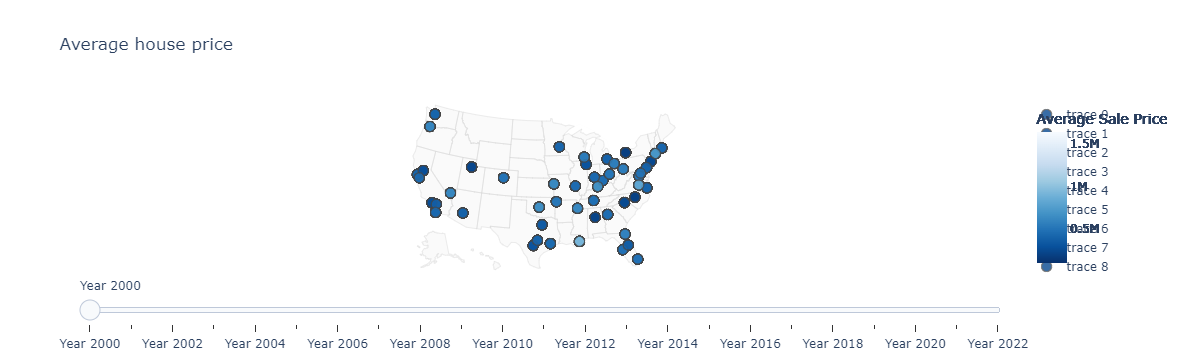

In [109]:
fig = go.Figure()

for year in np.arange(2000,2023):
    df_year = df[df['Year'] == year]
    fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
        lon = df_year['Longitude'],
        lat = df_year['Latitude'],
        text = df_year['Average House Price'],
        mode = 'markers',
        #layout = layout,
        marker = dict(
            size = 10,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = df['Average House Price'].min(),
            color = df['Average House Price'],
            cmax = df['Average House Price'].max(),
            colorbar_title="Average Sale Price"
            )
    ))
    
fig.update_layout(
        title = 'Average house price',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        )
        
    )

#layout = {
#   "title": "The Interactive Map of House Prices of United States"
sliders = [
    {
        "pad" : {"t":1},
        "steps" : [
            {
                'method':'update',
                'label':'Year 2000',
                'args' : [{'visible':[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2001',
                "args" : [{"visible":[False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2002',
                "args" : [{"visible":[False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2003',
                "args" : [{"visible":[False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2004',
                "args" : [{"visible":[False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2005',
                "args" : [{"visible":[False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2006',
                "args" : [{"visible":[False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2007',
                "args" : [{"visible":[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2008',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2009',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2010',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2011',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2012',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2013',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2014',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2015',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2016',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2017',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2018',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2019',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2020',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False]}]
            },
            {
                'method':'update',
                'label':'Year 2021',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]}]
            },
            {
                'method':'update',
                'label':'Year 2022',
                "args" : [{"visible":[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]}]
            }
        ],"active":0
    }
]


fig.update_layout({'sliders':sliders})
fig.show()

In [74]:
df_year.shape

(50, 7)

In [107]:
df['Average House Price'].min()

90724.67

In [86]:
ls=[]
for i in np.arange(2000,2023):
    ls.append(False)

In [89]:
print(ls)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
